## Daily exercise, part 1

In this exercise you are asked to work with two different datasets:
- `closing_prices.csv` contains the daily closing price in 2020 for ten different stocks.
- `EXR.xlsx` contains that daily exchange rate from USD to NOK in 2020 retrieved from Norges Bank.

You are asked to:

1. Import (and clean) the files
2. Merge the files and convert the closing price from USD to NOK
3. Create and save a graph that shows the daily closing price in NOK for Apple

In [19]:
import pandas as pd

# load the EXR data and closing prices data
exr_import = pd.read_excel("data/EXR.xlsx", skiprows=18)


# transpose the data to make the dates as a single column and the values as another
exr_import_cleaned = exr_import.transpose()

# reset index column
exr_import_cleaned.reset_index(drop=True, inplace=True)

# rename the columns
exr_import_cleaned.columns = ['Date', 'Exchange_Rate']

# convert column types
exr_import_cleaned['Date'] = pd.to_datetime(exr_import_cleaned['Date'])
exr_import_cleaned['Exchange_Rate'] = pd.to_numeric(exr_import_cleaned['Exchange_Rate'])

print(exr_import_cleaned)


          Date  Exchange_Rate
0   2020-01-02         8.7919
1   2020-01-03         8.8199
2   2020-01-06         8.7983
3   2020-01-07         8.8210
4   2020-01-08         8.8626
..         ...            ...
248 2020-12-23         8.7324
249 2020-12-28         8.6515
250 2020-12-29         8.6059
251 2020-12-30         8.5881
252 2020-12-31         8.5326

[253 rows x 2 columns]


In [20]:
# load closing prices data set
closing_prices = pd.read_csv("data/closing_prices.csv")

# closing_prices.info()

# convert type
closing_prices["Date"] = pd.to_datetime(closing_prices["Date"])

print(closing_prices)


           Date       Close Stock
0    2020-01-02   75.087502  AAPL
1    2020-01-03   74.357498  AAPL
2    2020-01-06   74.949997  AAPL
3    2020-01-07   74.597504  AAPL
4    2020-01-08   75.797501  AAPL
...         ...         ...   ...
2515 2020-12-23  143.220001   WMT
2516 2020-12-24  143.500000   WMT
2517 2020-12-28  145.220001   WMT
2518 2020-12-29  144.300003   WMT
2519 2020-12-30  144.179993   WMT

[2520 rows x 3 columns]


In [21]:
# Merge the datasets on 'Date'
merged_data = pd.merge(closing_prices, exr_import_cleaned, on='Date', how='inner')

# convert the closing price from USD to NOK
merged_data['Close_NOK'] = merged_data['Close'] * merged_data['Exchange_Rate']

# final merged data
print(merged_data)

           Date       Close Stock  Exchange_Rate    Close_NOK
0    2020-01-02   75.087502  AAPL         8.7919   660.161809
1    2020-01-03   74.357498  AAPL         8.8199   655.825697
2    2020-01-06   74.949997  AAPL         8.7983   659.432559
3    2020-01-07   74.597504  AAPL         8.8210   658.024583
4    2020-01-08   75.797501  AAPL         8.8626   671.762932
...         ...         ...   ...            ...          ...
2455 2020-12-22  144.199997   WMT         8.6558  1248.166334
2456 2020-12-23  143.220001   WMT         8.7324  1250.654337
2457 2020-12-28  145.220001   WMT         8.6515  1256.370839
2458 2020-12-29  144.300003   WMT         8.6059  1241.831396
2459 2020-12-30  144.179993   WMT         8.5881  1238.232198

[2460 rows x 5 columns]


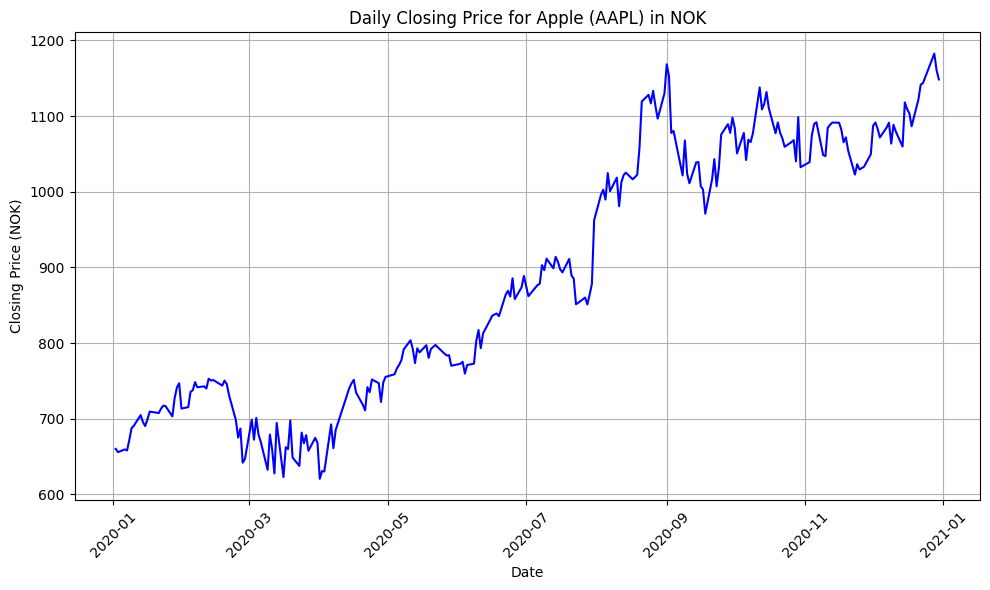

In [22]:
import matplotlib.pyplot as plt


# filter data for AAPL
apple_data = merged_data[merged_data['Stock'] == 'AAPL']

# plot the daily closing price in NOK for Apple
plt.figure(figsize=(10, 6))
plt.plot(apple_data['Date'],
         apple_data['Close_NOK'], 
         label='Apple Daily Close (NOK)', 
         color='blue'
    )

# beautify plot
plt.title('Daily Closing Price for Apple (AAPL) in NOK')
plt.xlabel('Date')
plt.ylabel('Closing Price (NOK)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# save the plot as a file
plt.savefig('data/apple_closing_price_nok.png')

plt.show()


## Daily exercise, part 2

**Task 1** In data anlysis, we often need to convert files from one file format to another. In this task, you should use a `for` loop to import each of the csv files in the `stocks` folder, and store the file as an excel spreadsheet in a folder named `stocks_excel`.

**Task 2** You are now asked to create a series of plots of the daily closing price using the file `closing_prices.csv`. The goal is to use `for` loops to generate the plots in all tasks to minimize code duplication. Import the file with the closing prices, and create the following plots:

**a)** Create a single graph that plots the daily closing prices of all of the stocks except Google (GOOG) and Amazon (AMZN). Remember to add a legend to identify the different stocks.

**b)** Create a figure with four subplots side-by-side (i.e., 1 x 4 subplot) with each subplot showing the closing price of a stock of your choice.

**c)** Plot the closing price of the same four stocks as above, but now the figure is a 2 x 2 subplot, i.e. two rows and two columns. 

Note that you should first search online for help with how to generate the plots, e.g., google "matplotlib 2x2 subplots". After you have looked online, then you can ask chatGPT for assistence or suggestions on how to improve your code.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [24]:
## convert .csv to .xlsx
# path to folder containing .csv files
input_folder = 'data/stocks/'

# path to output folder 
output_folder = 'data/stocks_excel/'

# create output folder if it doesn't already exist
os.makedirs(output_folder, exist_ok=True)

# create a list of all .csv files in the stocks folder
stock_files = [f for f in os.listdir(input_folder) 
               if f.endswith('.csv')
            ]

# loop over each .csv file and convert to .xlsx filetype
for file_name in stock_files:
    
    csv_path = os.path.join(input_folder, file_name)

    df = pd.read_csv(csv_path)
    
    # define the filename for the excel file
    excel_file_name = file_name.replace('.csv', '.xlsx')
    excel_path = os.path.join(output_folder, excel_file_name)
    
    # save as .xlsx file to output folder destination
    df.to_excel(excel_path, index=False)

    # looks good
    #print(excel_path)


# dictionary with color palette for each stock to maintain color consistency
color_palette = {
    'AAPL': 'blue',
    'BABA': 'orange',
    'FB': 'green',
    'JNJ': 'red',
    'JPM': 'purple',
    'MSFT': 'brown',
    'TSLA': 'pink',
    'WMT': 'cyan'
}

Task a)


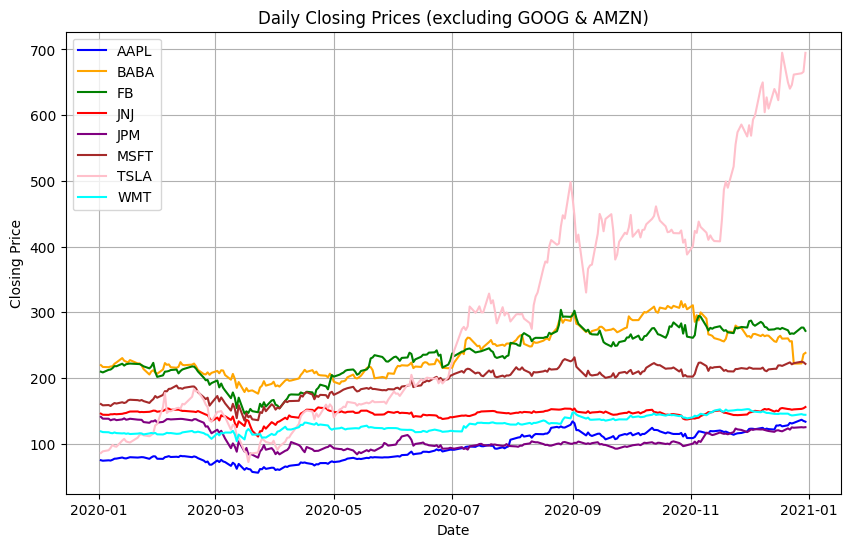

In [25]:
## Daily Closing Prices (excluding GOOG & AMZN)
print("Task a)")

# filter out Google (GOOG) and Amazon (AMZN)
excluded_stocks = ['GOOG', 'AMZN']
df_subset = closing_prices[~closing_prices['Stock'].isin(excluded_stocks)].copy()

# get the unique stock symbols remaining
stocks_for_plot = df_subset['Stock'].unique()

# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# loop over each stock and plot its daily closing price
for stock in stocks_for_plot:
    data_stock = df_subset[df_subset['Stock'] == stock]
    ax.plot(data_stock['Date'], data_stock['Close'], label=stock, color=color_palette[stock])

# beautify
ax.set_title('Daily Closing Prices (excluding GOOG & AMZN)')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
ax.grid(True)

plt.show()




Task b)


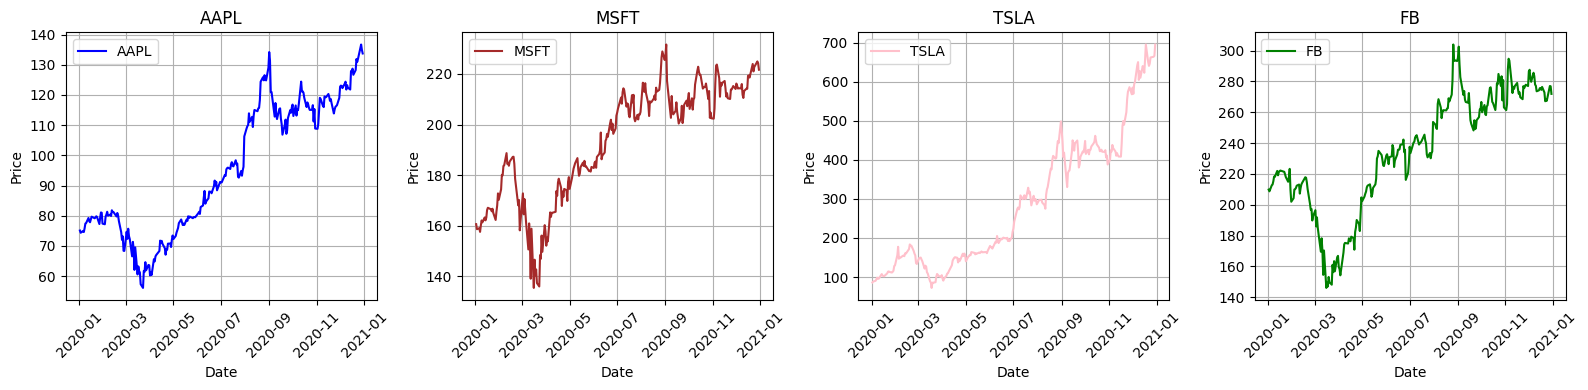

In [ ]:
## Subplots of 4 stocks' closing price
print("Task b)")

# chosen stocks
stocks_picked = ['AAPL', 'MSFT', 'TSLA', 'FB']

# create a figure with 1 x 4 subplots
# can set "sharey=True" as argument to keep y-axis identical across stocks chosen
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True)


# loop over each stock and each axis
for i, stock in enumerate(stocks_picked):

    data_stock = df_subset[df_subset['Stock'] == stock]
    
    # plot on the i-th axis
    axes[i].plot(data_stock['Date'], 
                 data_stock['Close'], 
                 label=stock, 
                 color=color_palette[stock]
                )
    
    # beautify
    axes[i].set_title(stock)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Task c)


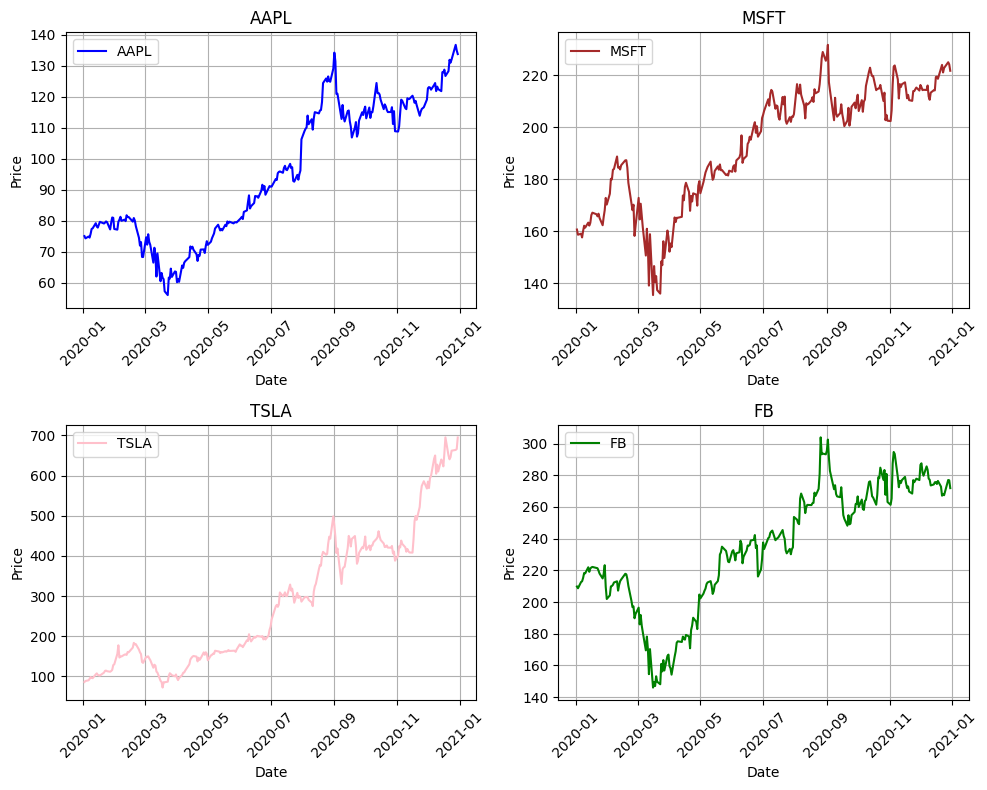

In [27]:
## create a plot for closing prices with 2 x 2 subplots
print("Task c)")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# flatten the axes array into a list so we can iterate
axes = axes.flatten()

# loop over each stock and each axis
for i, stock in enumerate(stocks_picked):
    data_stock = df_subset[df_subset['Stock'] == stock]
    # plot on the i-th axis
    axes[i].plot(data_stock['Date'], 
                 data_stock['Close'], 
                 label=stock, 
                 color=color_palette[stock])
    
    # beautify
    axes[i].set_title(stock)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

plt.tight_layout()
plt.show()